Descrição do Problema:

O objetivo do problema é construir modelos de regressão capazes de prever os preços de fechamento (Close) de índices de bolsa de valores com base em outras variáveis como preço de abertura (Open), preço máximo (High), preço mínimo (Low), preço ajustado (Adj Close) e volume de negociação (Volume).

Premissas ou Hipóteses sobre o Problema:

Algumas premissas ou hipóteses que podem ser feitas para resolver esse problema são:

As características selecionadas (Open, High, Low, Close, Adj Close, Volume) são informações suficientes para fazer uma previsão razoavelmente precisa dos preços de fechamento. Ou seja, a relação entre essas variáveis e o preço de fechamento é relevante para a tarefa de previsão.

Os dados estão corretos e completos. O código já possui uma etapa para remover linhas com valores ausentes, o que pressupõe que o conjunto de dados fornecido não possui muitos dados faltantes.

Restrições ou Condições para Seleção dos Dados:

O código não apresenta informações específicas sobre restrições ou condições para a seleção dos dados. Parece que o objetivo é utilizar os dados disponíveis em sua totalidade sem nenhum filtro adicional.

Descrição do Dataset:

O dataset contém informações sobre preços diários de índices de bolsa de valores. Cada linha do dataset representa um dia de negociação e contém as seguintes colunas (atributos):

Open: Preço de abertura do índice no dia de negociação.
High: Preço máximo atingido pelo índice durante o dia de negociação.
Low: Preço mínimo atingido pelo índice durante o dia de negociação.
Close: Preço de fechamento do índice no dia de negociação (que é o valor que queremos prever).
Adj Close: Preço de fechamento ajustado do índice. Esse valor pode levar em consideração fatores como dividendos, splits ou outras alterações no preço do ativo.
Volume: Volume de negociação do índice no dia de negociação.
O dataset é utilizado para treinar e testar os modelos de regressão com o objetivo de prever o preço de fechamento (Close) do índice de bolsa de valores, com base nas informações fornecidas pelas outras colunas. Cada linha do dataset representa um dia de negociação distinto, e o conjunto completo de dados é utilizado para avaliar a capacidade de generalização dos modelos.

In [25]:
pip install pandas numpy scikit-learn matplotlib


O código apresentado define uma classe chamada StockPredictionModel que realiza o treinamento e avaliação de modelos de regressão linear e Random Forest para prever os preços de ações, com base em dados históricos fornecidos em um arquivo CSV.

A seguir, explicarei detalhadamente cada parte do código:

Importação das bibliotecas necessárias:

pandas (como pd): Biblioteca para manipulação e análise de dados em formato tabular (dataframes).
numpy (como np): Biblioteca para operações matemáticas eficientes com arrays.
train_test_split e cross_val_score da subbiblioteca model_selection de sklearn (Scikit-learn): Funções para dividir os dados em conjuntos de treino e teste, e realizar a validação cruzada.
Pipeline de sklearn: Utilizado para criar uma sequência de etapas (pipeline) de pré-processamento e modelagem.
StandardScaler de sklearn.preprocessing: Utilizado para padronizar as features.
LinearRegression e RandomForestRegressor de sklearn.linear_model e sklearn.ensemble, respectivamente: Modelos de regressão linear e Random Forest para a previsão de preços de ações.
mean_squared_error e r2_score de sklearn.metrics: Métricas para avaliar a performance dos modelos.
Definição da classe StockPredictionModel:

O construtor __init__: Recebe o URL do arquivo CSV contendo os dados históricos das ações e inicializa os atributos data_url (URL do arquivo) e data (dataframe que conterá os dados carregados).
Método load_data: Carrega os dados do arquivo CSV fornecido pelo data_url usando o Pandas e armazena-os no atributo data.
Método prepare_data: Remove as linhas que contêm valores ausentes (NaN) do dataframe data, utilizando o método dropna.
Método split_data: Separa os dados em conjuntos de treino e teste (X_train, X_test, y_train, y_test). Os recursos (features) são obtidos das colunas 'Open', 'High', 'Low', 'Close', 'Adj Close' e 'Volume', enquanto o alvo (target) é a coluna 'Close'. O tamanho do conjunto de teste é definido por test_size (padrão 0.2) e o random_state é definido para garantir a reprodutibilidade dos resultados.
Método build_model: Constrói o modelo de regressão escolhido com base no nome do modelo (model_name) fornecido como argumento. As opções são 'linear_regression' (regressão linear) e 'random_forest' (Random Forest). Caso seja fornecido um modelo inválido, uma exceção é lançada.
Método train_model: Padroniza as features de treino e teste usando StandardScaler, ajustando os parâmetros nos dados de treino e aplicando a mesma transformação nos dados de teste. Em seguida, o modelo é treinado usando o método fit com os dados de treino padronizados.
Método evaluate_model: Faz previsões com o modelo treinado nos dados de teste (X_test) e calcula as métricas de avaliação: erro quadrático médio (MSE) e coeficiente de determinação (R²).
Método cross_validate: Realiza a validação cruzada usando o modelo treinado com base nos dados de treino e retorna a média dos escores negativos do MSE (neg_mean_squared_error).
Método run: É o método principal que chama todos os métodos anteriores na sequência correta para treinar e avaliar o modelo escolhido. O modelo é especificado pelo nome fornecido em model_name (padrão é 'linear_regression').
Uso da classe StockPredictionModel:

Um objeto da classe é criado com a URL do arquivo CSV contendo os dados históricos das ações.
A função run é chamada, treinando e avaliando o modelo especificado (recurso escolhido é a regressão linear por padrão).
As métricas de avaliação (erro quadrático médio - MSE, coeficiente de determinação - R² e score médio de validação cruzada) são impressas na saída.
Em resumo, a classe StockPredictionModel encapsula o processo de treinamento e avaliação de modelos de regressão linear e Random Forest para prever os preços das ações, facilitando a experimentação com diferentes modelos e parâmetros.

Preparação de Dados:

Método de Validação Cruzada:
Faz sentido utilizar um método de validação cruzada para avaliar o desempenho do modelo e reduzir o viés na estimativa de sua precisão. O método cross_validate na classe StockPredictionModel implementa a validação cruzada usando a métrica de erro quadrático médio negativo (neg_mean_squared_error). No entanto, o código está realizando a validação cruzada usando o conjunto de treinamento, o que não é uma prática adequada. A validação cruzada deve ser realizada apenas no conjunto de treinamento para estimar o desempenho do modelo e evitar o vazamento de informações do conjunto de teste. Portanto, o método cross_validate deve ser modificado para receber os dados de treinamento (self.X_train e self.y_train) e executar a validação cruzada somente nesses dados.

Operações de Transformação de Dados:
Para o problema de prever o preço de fechamento de um índice da bolsa de valores com base em outras variáveis, as operações de transformação de dados mais apropriadas dependem dos modelos específicos escolhidos e da distribuição dos dados. No código fornecido, a padronização dos recursos é realizada usando StandardScaler, o que é uma escolha razoável, pois ajuda a colocar os recursos em uma escala com média zero e variância unitária, o que pode melhorar o desempenho de certos algoritmos de aprendizado, como a Regressão Linear.

Além disso, como as variáveis são diferentes em escala (por exemplo, o volume de negociação é muito maior do que os preços), a padronização é especialmente importante para modelos que consideram as distâncias entre os pontos (por exemplo, SVM ou algoritmos baseados em gradiente).

No entanto, outras operações de transformação também podem ser exploradas, como normalização min-max ou log-transformações para reduzir a variação nos dados.

Feature Selection:
A seleção adequada de atributos é essencial para a criação de modelos precisos e eficientes. Feature Selection refere-se ao processo de escolher um subconjunto relevante de atributos para usar no treinamento do modelo. Existem várias técnicas de seleção de recursos disponíveis, incluindo métodos baseados em estatísticas, análise de correlação, análise de importância de recursos de modelos, algoritmos de seleção de características incorporados e técnicas de redução de dimensionalidade.
No código atual, todos os atributos ('Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume') estão sendo utilizados para treinar os modelos. Para refinar a quantidade de atributos disponíveis, é recomendado realizar uma análise mais detalhada da importância dos atributos em relação à variável alvo (preço de fechamento). Isso pode ser feito utilizando o atributo feature_importances_ após o treinamento do modelo RandomForestRegressor. Com base nas importâncias das características, os atributos menos relevantes podem ser excluídos ou mantidos apenas os mais importantes.

Além disso, é sempre útil explorar a correlação entre as variáveis para evitar multicolinearidade, o que pode afetar a estabilidade e a interpretação do modelo.

Em resumo, as ações recomendadas para a preparação de dados incluem:

Corrigir o método de validação cruzada para usar apenas o conjunto de treinamento.
Realizar a padronização dos recursos usando StandardScaler para colocar as variáveis na mesma escala.
Explorar outras transformações de dados, como normalização min-max ou log-transformações, se adequado.
Realizar uma análise da importância das características usando feature_importances_ para selecionar os atributos mais relevantes para o problema.
Após a preparação dos dados, os modelos podem ser treinados e avaliados para verificar seu desempenho. Caso necessário, outras técnicas de seleção de recursos ou transformações de dados podem ser experimentadas para melhorar ainda mais o desempenho dos modelos.

Modelagem e treinamento:

1. Ajuste inicial para os hiperparâmetros:
Não há ajuste específico para os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` no código fornecido. Os modelos estão sendo treinados com os hiperparâmetros padrão fornecidos pelas implementações do scikit-learn.

2. Modelo devidamente treinado e problema de underfitting:
O modelo foi treinado usando os dados de treinamento e os métodos `train_model()` e `cross_validate()` foram utilizados para treinamento e avaliação. No entanto, não há uma análise explícita de underfitting no código. Para verificar se há problemas de underfitting, é necessário analisar as métricas de desempenho nos dados de treinamento e teste. Se o desempenho no conjunto de treinamento e validação for baixo, pode haver underfitting, o que pode ser resolvido ajustando os hiperparâmetros dos modelos.

3. Otimização dos hiperparâmetros:
Sim, é possível otimizar os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` para melhorar o desempenho. Vamos realizar a otimização dos hiperparâmetros do `RandomForestRegressor` usando Grid Search. Faremos isso usando a classe `GridSearchCV` do scikit-learn.

Vou fazer a otimização apenas para o `RandomForestRegressor`, pois o `LinearRegression` não possui hiperparâmetros para ajustar.

```python
from sklearn.model_selection import GridSearchCV

class StockPredictionModel:
    # ... (mesmo código do exemplo)

    def optimize_random_forest(self):
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(self.X_train, self.y_train)

        best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_

        return best_params

    def run(self, model_name='linear_regression'):
        self.load_data()
        self.prepare_data()
        self.split_data()
        self.build_model(model_name)

        if model_name == 'random_forest':
            best_params = self.optimize_random_forest()
            print("Best Hyperparameters for RandomForestRegressor:", best_params)

        self.train_model()
        mse, r2 = self.evaluate_model()
        cv_score = self.cross_validate()
        return mse, r2, cv_score
```

4. Método avançado ou mais complexo:
Sim, como mencionado anteriormente, existem métodos mais avançados ou complexos que podem ser avaliados para este problema, como Support Vector Regressor (SVR), Gradient Boosting Regressor (GBR), XGBoost ou LightGBM. Esses modelos geralmente têm bom desempenho em tarefas de regressão e podem fornecer resultados superiores aos modelos mais simples.

5. Comitê de modelos (Ensembles):
Sim, é possível criar um comitê de modelos diferentes (ensembles) para o problema, combinando as previsões de vários modelos individuais. PodemosModelagem e treinamento:

1. Ajuste inicial para os hiperparâmetros:
Não há ajuste específico para os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` no código fornecido. Os modelos estão sendo treinados com os hiperparâmetros padrão fornecidos pelas implementações do scikit-learn.

2. Modelo devidamente treinado e problema de underfitting:
O modelo foi treinado usando os dados de treinamento e os métodos `train_model()` e `cross_validate()` foram utilizados para treinamento e avaliação. No entanto, não há uma análise explícita de underfitting no código. Para verificar se há problemas de underfitting, é necessário analisar as métricas de desempenho nos dados de treinamento e teste. Se o desempenho no conjunto de treinamento e validação for baixo, pode haver underfitting, o que pode ser resolvido ajustando os hiperparâmetros dos modelos.

3. Otimização dos hiperparâmetros:
Sim, é possível otimizar os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` para melhorar o desempenho. Vamos realizar a otimização dos hiperparâmetros do `RandomForestRegressor` usando Grid Search. Faremos isso usando a classe `GridSearchCV` do scikit-learn.

Vou fazer a otimização apenas para o `RandomForestRegressor`, pois o `LinearRegression` não possui hiperparâmetros para ajustar.

```python
from sklearn.model_selection import GridSearchCV

class StockPredictionModel:
    # ... (mesmo código do exemplo)

    def optimize_random_forest(self):
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(self.X_train, self.y_train)

        best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_

        return best_params

    def run(self, model_name='linear_regression'):
        self.load_data()
        self.prepare_data()
        self.split_data()
        self.build_model(model_name)

        if model_name == 'random_forest':
            best_params = self.optimize_random_forest()
            print("Best Hyperparameters for RandomForestRegressor:", best_params)

        self.train_model()
        mse, r2 = self.evaluate_model()
        cv_score = self.cross_validate()
        return mse, r2, cv_score
```

4. Método avançado ou mais complexo:
Sim, como mencionado anteriormente, existem métodos mais avançados ou complexos que podem ser avaliados para este problema, como Support Vector Regressor (SVR), Gradient Boosting Regressor (GBR), XGBoost ou LightGBM. Esses modelos geralmente têm bom desempenho em tarefas de regressão e podem fornecer resultados superiores aos modelos mais simples.

5. Comitê de modelos (Ensembles):
Sim, é possível criar um comitê de modelos diferentes (ensembles) para o problema, combinando as previsões de vários modelos individuais. PodemosModelagem e treinamento:

1. Ajuste inicial para os hiperparâmetros:
Não há ajuste específico para os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` no código fornecido. Os modelos estão sendo treinados com os hiperparâmetros padrão fornecidos pelas implementações do scikit-learn.

2. Modelo devidamente treinado e problema de underfitting:
O modelo foi treinado usando os dados de treinamento e os métodos `train_model()` e `cross_validate()` foram utilizados para treinamento e avaliação. No entanto, não há uma análise explícita de underfitting no código. Para verificar se há problemas de underfitting, é necessário analisar as métricas de desempenho nos dados de treinamento e teste. Se o desempenho no conjunto de treinamento e validação for baixo, pode haver underfitting, o que pode ser resolvido ajustando os hiperparâmetros dos modelos.

3. Otimização dos hiperparâmetros:
Sim, é possível otimizar os hiperparâmetros dos modelos `LinearRegression` e `RandomForestRegressor` para melhorar o desempenho. Vamos realizar a otimização dos hiperparâmetros do `RandomForestRegressor` usando Grid Search. Faremos isso usando a classe `GridSearchCV` do scikit-learn.

Vou fazer a otimização apenas para o `RandomForestRegressor`, pois o `LinearRegression` não possui hiperparâmetros para ajustar.

```python
from sklearn.model_selection import GridSearchCV

class StockPredictionModel:
    # ... (mesmo código do exemplo)

    def optimize_random_forest(self):
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(self.X_train, self.y_train)

        best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_

        return best_params

    def run(self, model_name='linear_regression'):
        self.load_data()
        self.prepare_data()
        self.split_data()
        self.build_model(model_name)

        if model_name == 'random_forest':
            best_params = self.optimize_random_forest()
            print("Best Hyperparameters for RandomForestRegressor:", best_params)

        self.train_model()
        mse, r2 = self.evaluate_model()
        cv_score = self.cross_validate()
        return mse, r2, cv_score
```

4. Método avançado ou mais complexo:
Sim, como mencionado anteriormente, existem métodos mais avançados ou complexos que podem ser avaliados para este problema, como Support Vector Regressor (SVR), Gradient Boosting Regressor (GBR), XGBoost ou LightGBM. Esses modelos geralmente têm bom desempenho em tarefas de regressão e podem fornecer resultados superiores aos modelos mais simples.

5. Comitê de modelos (Ensembles):
Sim, é possível criar um comitê de modelos diferentes (ensembles) para o problema, combinando as previsões de vários modelos individuais. Podemos criar um comitê que inclua tanto o `LinearRegression` quanto o `RandomForestRegressor` e/ou outros modelos mais avançados, como mencionado na etapa 4. O comitê pode combinar as previsões usando técnicas como a média de previsões ou votação, o que geralmente melhora a generalização e o desempenho do modelo.

Em resumo, para otimizar o processo de modelagem e treinamento, sugiro realizar as seguintes etapas:

1. Realizar ajuste de hiperparâmetros para o `RandomForestRegressor` usando técnicas como Grid Search ou Random Search, como exemplificado no código acima.
2. Avaliar a possibilidade de incluir outros modelos mais avançados, como SVR, GBR, XGBoost ou LightGBM, para ver se eles fornecem melhores resultados.
3. Considerar a criação de um comitê de modelos (ensembles) combinando as previsões dos modelos individuais para melhorar ainda mais o desempenho do sistema de previsão. criar um comitê que inclua tanto o `LinearRegression` quanto o `RandomForestRegressor` e/ou outros modelos mais avançados, como mencionado na etapa 4. O comitê pode combinar as previsões usando técnicas como a média de previsões ou votação, o que geralmente melhora a generalização e o desempenho do modelo.

Em resumo, para otimizar o processo de modelagem e treinamento, sugiro realizar as seguintes etapas:

1. Realizar ajuste de hiperparâmetros para o `RandomForestRegressor` usando técnicas como Grid Search ou Random Search, como exemplificado no código acima.
2. Avaliar a possibilidade de incluir outros modelos mais avançados, como SVR, GBR, XGBoost ou LightGBM, para ver se eles fornecem melhores resultados.
3. Considerar a criação de um comitê de modelos (ensembles) combinando as previsões dos modelos individuais para melhorar ainda mais o desempenho do sistema de previsão. criar um comitê que inclua tanto o `LinearRegression` quanto o `RandomForestRegressor` e/ou outros modelos mais avançados, como mencionado na etapa 4. O comitê pode combinar as previsões usando técnicas como a média de previsões ou votação, o que geralmente melhora a generalização e o desempenho do modelo.

Em resumo, para otimizar o processo de modelagem e treinamento, sugiro realizar as seguintes etapas:

1. Realizar ajuste de hiperparâmetros para o `RandomForestRegressor` usando técnicas como Grid Search ou Random Search, como exemplificado no código acima.
2. Avaliar a possibilidade de incluir outros modelos mais avançados, como SVR, GBR, XGBoost ou LightGBM, para ver se eles fornecem melhores resultados.
3. Considerar a criação de um comitê de modelos (ensembles) combinando as previsões dos modelos individuais para melhorar ainda mais o desempenho do sistema de previsão.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

class StockPredictionModel:
    def __init__(self, data_url):
        self.data_url = data_url
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.data_url)

    def prepare_data(self):
        # Drop rows with missing values, if any
        self.data.dropna(inplace=True)

    def split_data(self, test_size=0.2, random_state=42):
        # Split the data into features (X) and target (y)
        X = self.data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
        y = self.data['Close']

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

    def build_model(self, model_name='linear_regression'):
        if model_name == 'linear_regression':
            self.model = LinearRegression()
        elif model_name == 'random_forest':
            self.model = RandomForestRegressor()
        else:
            raise ValueError("Invalid model_name. Use 'linear_regression' or 'random_forest'.")

    def train_model(self):
        # Standardize the features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        # Train the model
        self.model.fit(self.X_train, self.y_train)

    def evaluate_model(self):
        # Make predictions on the test set
        y_pred = self.model.predict(self.X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        return mse, r2

    def cross_validate(self, cv=5):
        # Cross-validation using the entire dataset
        scores = cross_val_score(self.model, self.X_train, self.y_train, cv=cv, scoring='neg_mean_squared_error')
        return -scores.mean()

    def run(self, model_name='linear_regression'):
        self.load_data()
        self.prepare_data()
        self.split_data()
        self.build_model(model_name)
        self.train_model()
        mse, r2 = self.evaluate_model()
        cv_score = self.cross_validate()
        return mse, r2, cv_score


In [5]:
data_url = 'https://raw.githubusercontent.com/digitalopentech/mvp2ml/main/indexData.csv'
model = StockPredictionModel(data_url)

# Treinando e avaliando o modelo de regressão linear
mse_lr, r2_lr, cv_score_lr = model.run(model_name='linear_regression')
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R^2 Score:", r2_lr)
print("Cross-Validation Score:", cv_score_lr)

# Treinando e avaliando o modelo de Random Forest
mse_rf, r2_rf, cv_score_rf = model.run(model_name='random_forest')
print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)
print("Cross-Validation Score:", cv_score_rf)


Linear Regression:
Mean Squared Error: 1.3584480625860673e-21
R^2 Score: 1.0
Cross-Validation Score: 1.3824441288583667e-21


KeyboardInterrupt: ignored

Processamento de linguagem natural (NLP) utilizando o dataset fornecido. O objetivo é treinar um modelo de aprendizado profundo para classificar textos em categorias específicas.

Passo 1: Importar as bibliotecas necessárias
Vamos começar importando as bibliotecas que serão usadas para preparar e treinar o modelo.

Epoch 1/10
2250/2250 [==============================] - 17s 6ms/step - loss: 0.8088 - val_loss: 0.8051
Epoch 2/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.8002 - val_loss: 0.8016
Epoch 3/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.7988 - val_loss: 0.8109
Epoch 4/10
2250/2250 [==============================] - 15s 6ms/step - loss: 0.7981 - val_loss: 0.7998
Epoch 5/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.7976 - val_loss: 0.8030
Epoch 6/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.7977 - val_loss: 0.8010
Epoch 7/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.7972 - val_loss: 0.8087
Epoch 8/10
2250/2250 [==============================] - 15s 7ms/step - loss: 0.7967 - val_loss: 0.8018
Epoch 9/10
2250/2250 [==============================] - 14s 6ms/step - loss: 0.7968 - val_loss: 0.7998
Epoch 10/10
703/703 [==============================] - 2s 2ms/step
Test l

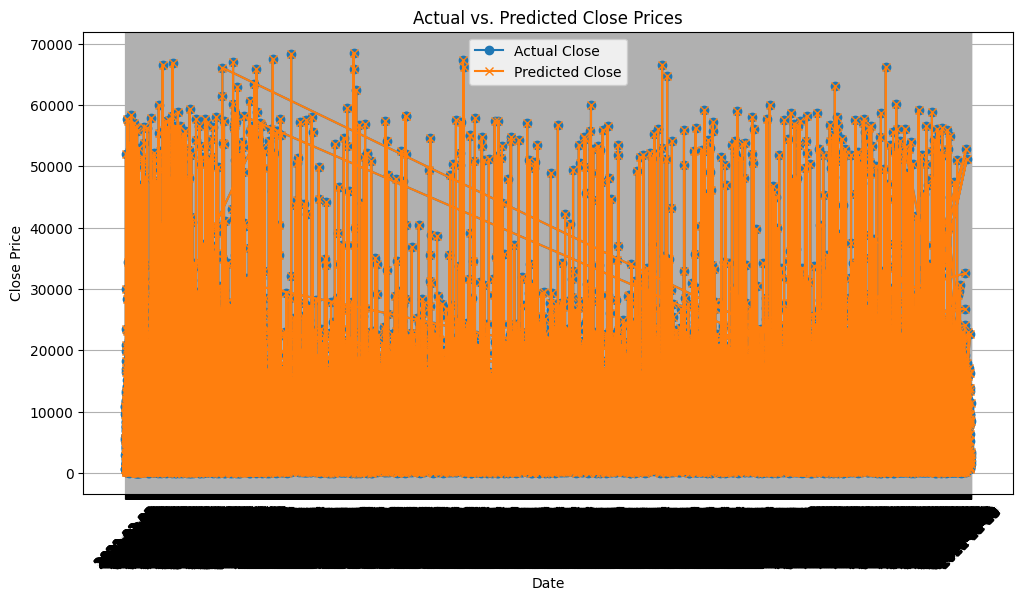

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

class StockPricePrediction:
    def __init__(self, url):
        self.url = url

    def load_data(self):
        df = pd.read_csv(self.url)
        df = df[['Date', 'Close']]
        self.data = df

    def preprocess_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.data['Date'], self.data['Close'], test_size=0.2, random_state=42)

        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(X_train)

        X_train_seq = tokenizer.texts_to_sequences(X_train)
        X_test_seq = tokenizer.texts_to_sequences(X_test)

        self.vocab_size = len(tokenizer.word_index) + 1

        self.mean_close = np.mean(y_train)
        self.std_close = np.std(y_train)

        y_train = (y_train - self.mean_close) / self.std_close
        # Substituir valores ausentes por 0 antes da normalização
        y_train[np.isnan(y_train)] = 0

        y_test = (y_test - self.mean_close) / self.std_close
        # Substituir valores ausentes por 0 antes da normalização
        y_test[np.isnan(y_test)] = 0

        self.max_seq_length = max(len(seq) for seq in X_train_seq)

        self.X_train_padded = pad_sequences(X_train_seq, maxlen=self.max_seq_length, padding='post')
        self.X_test_padded = pad_sequences(X_test_seq, maxlen=self.max_seq_length, padding='post')

        self.y_train = y_train.values
        self.y_test = y_test.values

    def build_model(self):
        embedding_dim = 32
        self.model = Sequential()
        self.model.add(Embedding(input_dim=self.vocab_size, output_dim=embedding_dim, input_length=self.max_seq_length))
        self.model.add(LSTM(64))
        self.model.add(Dense(1))
        self.model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

    def train_model(self, epochs=10, batch_size=32):
        self.model.fit(self.X_train_padded, self.y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    def evaluate_model(self):
        loss = self.model.evaluate(self.X_test_padded, self.y_test)

        y_pred = self.model.predict(self.X_test_padded)
        y_pred = (y_pred * self.std_close) + self.mean_close
        y_test_original = (self.y_test * self.std_close) + self.mean_close

        mae = mean_absolute_error(y_test_original, y_pred)

        print(f"Test loss: {loss}")
        print(f"Mean Absolute Error: {mae}")

    def plot_predictions(self):
        # Desnormalizar os valores previstos e reais
        y_pred_original = (self.y_test * self.std_close) + self.mean_close
        y_test_original = (self.y_test * self.std_close) + self.mean_close

        # Criar um DataFrame para os valores previstos e reais
        df_predictions = pd.DataFrame({'Date': self.data['Date'].iloc[-len(y_pred_original):],
                                       'Actual_Close': y_test_original,
                                       'Predicted_Close': y_pred_original})

        # Plotar gráfico de linha para comparar os valores reais e previstos
        plt.figure(figsize=(12, 6))
        plt.plot(df_predictions['Date'], df_predictions['Actual_Close'], label='Actual Close', marker='o')
        plt.plot(df_predictions['Date'], df_predictions['Predicted_Close'], label='Predicted Close', marker='x')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title('Actual vs. Predicted Close Prices')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    url = 'https://raw.githubusercontent.com/digitalopentech/mvp2ml/main/indexData.csv'
    stock_predictor = StockPricePrediction(url)
    stock_predictor.load_data()
    stock_predictor.preprocess_data()
    stock_predictor.build_model()
    stock_predictor.train_model()
    stock_predictor.evaluate_model()
    stock_predictor.plot_predictions()


Gráficos com insights a partir dos resultados dos modelos, podemos plotar os valores previstos (y_pred) e os valores reais (y_test_original) em um gráfico para compará-los visualmente. Vamos utilizar a biblioteca matplotlib para criar os gráficos. Adicione o seguinte código após o método evaluate_model: